<a href="https://colab.research.google.com/github/Suhyun77/Algorithm-and-Data-Structure/blob/main/%EC%B5%9C%EB%8B%A8%EA%B2%BD%EB%A1%9C%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **최단 경로 알고리즘**

- **가장 짧은 경로**를 찾는 알고리즘
- 그래프에서 각 지점은 **정점(vertex)/노드(node)**로, 지점 간 연결된 도로는 **간선/엣지(edge)**로 표현된다.
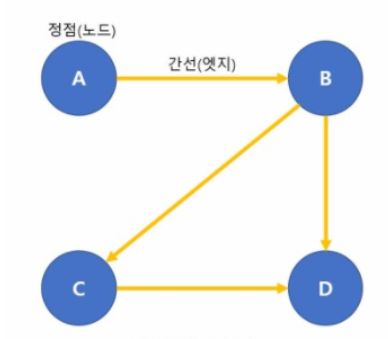

## 다익스트라 최단 경로 알고리즘
- 특정한 노드에서 출발해 다른 모든 노드로 가는 **모든 최단 경로 계산**
- 이 알고리즘은 **음의 간선이 없을 때** 정상적으로 동작하며, 현실 세계의 도로(간선)에서 길찾기 문제를 해결하는데 활용된다. (현실 도로는 음의 간선으로 표현되지 않으므로)
- **매 상황에서 방문하지 않은 가장 비용이 적은 노드를 선택**해 임의의 과정을 반복하므로 **그리디 알고리즘**으로 분류
- 단계를 거치며 **한 번 처리된 노드의 최단 거리는 고정**되어 더 이상 바뀌지 않는다.
    - 한 단계당 하나의 노드에 대한 최단 거리를 확실히 찾는 것
- 다익스트라 알고리즘을 수행한 뒤에 **테이블에 각 노드까지의 최단 거리 정보가 저장**됨
    - 완벽한 형태의 최단 경로를 구하려면 소스코드에 추가적인 기능을 더 넣어야 함


In [5]:
graph = [[] for i in range(3 + 1)]
graph

[[], [], [], []]

In [ ]:
"""
간단한 구현 방법
: 단계마다 방문하지 않은 노드 중에서 최단 거리가 가장 짧은 노드를 선택하기 위해 매  단계마다 1차원 테이블의 모든 원소를 확인(순차 탐색)한다.
"""

import sys
input = sys.stdin.readline
INF = int(1e9) # 테이블 : 무한을 의미하는 값으로 10억을 설정

# 노드의 개수, 간선의 개수를 입력받기
n, m = map(int, input().split())
# 시작 노드 번호를 입력받기
start = int(input())
# 각 노드에 연결되어 있는 노드에 대한 정보를 담는 리스트를 만들기
graph = [[] for i in range(n + 1)]
# 방문한 적이 있는지 체크하는 목적의 리스트를 만들기
visited = [False] * (n + 1)
# 최단 거리 테이블을 모두 무한으로 초기화
distance = [INF] * (n + 1)

# 모든 간선 정보를 입력받기
for _ in range(m):
    a, b, c = map(int, input().split())
    # a번 노드에서 b번 노드로 가는 비용이 c라는 의미
    graph[a].append((b, c))  # a번째 리스트에 b와c를 튜플로 묶어 넣어주기

# 방문하지 않은 노드 중에서, 가장 최단 거리가 짧은 노드의 번호를 반환
def get_smallest_node():
    min_value = INF
    index = 0 # 가장 최단 거리가 짧은 노드(인덱스)
    for i in range(1, n + 1):
        if distance[i] < min_value and not visited[i]:
            min_value = distance[i]
            index = i
    return index

def dijkstra(start):
    # 시작 노드에 대해서 초기화
    distance[start] = 0
    visited[start] = True
    for j in graph[start]:
        distance[j[0]] = j[1]
    # 시작 노드를 제외한 전체 n - 1개의 노드에 대해 반복
    for i in range(n - 1):
        # 현재 최단 거리가 가장 짧은 노드를 꺼내서, 방문 처리
        now = get_smallest_node()
        visited[now] = True
        # 현재 노드와 연결된 다른 노드를 확인
        for j in graph[now]:
            cost = distance[now] + j[1]
            # 현재 노드를 거쳐서 다른 노드로 이동하는 거리가 더 짧은 경우
            if cost < distance[j[0]]:
                distance[j[0]] = cost

# 다익스트라 알고리즘을 수행
dijkstra(start)

# 모든 노드로 가기 위한 최단 거리를 출력
for i in range(1, n + 1):
    # 도달할 수 없는 경우, 무한(INFINITY)이라고 출력
    if distance[i] == INF:
        print("INFINITY")
    # 도달할 수 있는 경우 거리를 출력
    else:
        print(distance[i])